In [1]:
# Import libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import datetime
import time

%matplotlib inline

In [2]:
# Load dataset
data_train = pd.read_csv('datasets/CleanDataTrain.csv')

In [3]:
# Drop unnecessary features
data_train.drop(['lobby_type'], axis=1, inplace=True)
for n in range(1, 6):
        del data_train['r{}_hero'.format(n)]
        del data_train['d{}_hero'.format(n)]

In [4]:
# Segregate features and labels into separate variables
X,y = data_train.iloc[:,0:92] , data_train.iloc[:,92]

In [5]:
scaler = StandardScaler()
rescaledX = scaler.fit_transform(X)

/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.7/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [6]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)

In [7]:
result = []
tol = [0.1, 0.01, 0.001, 0.0001]
for i in tol:
    print(i)
    model = LogisticRegression(C=i, random_state=42)
    start_time = datetime.datetime.now()
    model_score = cross_val_score(model, rescaledX, y, cv=kf, scoring='roc_auc', n_jobs=-1)
    print('Time elapsed:', datetime.datetime.now() - start_time)
    print(model_score)
    result.append(np.mean(model_score))

0.1
Time elapsed: 0:00:05.713853
[0.71473702 0.71630672 0.71626466 0.71727287 0.71859946]
0.01
Time elapsed: 0:00:05.211980
[0.7147459  0.7163128  0.71633048 0.71724976 0.71864826]
0.001
Time elapsed: 0:00:03.981234
[0.71452753 0.71590583 0.7163856  0.71691469 0.71860973]
0.0001
Time elapsed: 0:00:02.529115
[0.70947131 0.71054883 0.71177751 0.71169704 0.71359801]


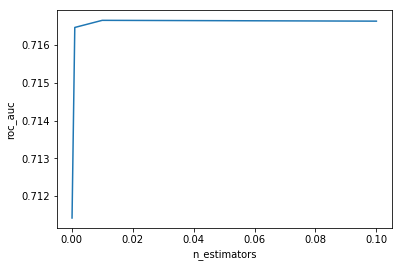

In [8]:
plt.plot(tol, result)
plt.xlabel('n_estimators')
plt.ylabel('roc_auc')
plt.show()

In [9]:
max_score = " ".join([repr(tol[result.index(max(result))]), repr(round(max(result), 2))])
print(max_score)

0.01 0.72


1. Как влияет на качество логистической регрессии удаление категориальных признаков (укажите новое значение метрики качества)? Чем вы можете объяснить это изменение?


Качество сохранилось, 0,72, потому что ранее модель распознала, что удаленные сейчас категориальные признаки не влияли на предсказание и являлись шумами.